In [12]:
%matplotlib notebook
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python3 "/content/drive/My Drive/Evolution.AI---RN/more_clevr.py"

directory ./data already exists
building test datasets...
building train datasets...
building validation datasets...
saving datasets...
tcmalloc: large alloc 1143668736 bytes == 0xe13fe000 @  0x7f81d394f2a4 0x591f47 0x4dd7c7 0x4e2be0 0x4e222a 0x4e0ea8 0x4e263b 0x4e1fcb 0x4e23cb 0x4e1fcb 0x4e34a6 0x454438 0x50a5aa 0x50c1f4 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f81d354bb97 0x5b26fa
tcmalloc: large alloc 1715503104 bytes == 0x1256ae000 @  0x7f81d394f2a4 0x591f47 0x4dd7c7 0x4e2be0 0x4e222a 0x4e0ea8 0x4e263b 0x4e1fcb 0x4e23f3 0x4e1fcb 0x4e34a6 0x454438 0x50a5aa 0x50c1f4 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f81d354bb97 0x5b26fa
datasets saved at ./data/more-clevr.pickle


In [ ]:
!python3 "/content/drive/My Drive/Evolution.AI---RN/error_analysis.py"

2020-09-09 10:20:57.168305: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
No PE, no LR padding
sim no V
loading data...
processing data...
624
10
no H saved
full saved


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
name = 'wrong_samples_noH.npy'
path = F"/content/drive/My Drive/Evolution.AI---RN/{name}"#Gdrive path
with open(path, 'rb') as f:
    wrong_samples_noH = np.load(f,allow_pickle=True)

name = 'wrong_samples_full.npy'
path = F"/content/drive/My Drive/Evolution.AI---RN/{name}"#Gdrive path
with open(path, 'rb') as f:
    wrong_samples_full = np.load(f,allow_pickle=True)
colors = ['red','green','blue','orange','gray','yellow']

In [ ]:
samples_noH = []
for batch in wrong_samples_noH:
  n = np.shape(batch[2])[0]
  for sample in range(n):
    img = batch[0][sample]
    qst = batch[1][sample]
    ans = batch[2][sample]
    samples_noH.append([img,qst,ans])
print(np.shape(samples_noH))
samples_full = []
for batch in wrong_samples_full:
  n = np.shape(batch[2])[0]
  for sample in range(n):
    img = batch[0][sample]
    qst = batch[1][sample]
    ans = batch[2][sample]
    samples_full.append([img,qst,ans])
print(np.shape(samples_full))

(86, 3)
(17, 3)


In [ ]:
def plot_fig(samples):
  num_of_img = np.shape(samples)[0]
  for i in range(num_of_img):
    img = np.einsum('abc->bca', samples[i][0])
    plt.figure(figsize=(5,5))
    plt.imshow(img[:,:,::-1])#BGR to RGB
    object1 = colors[np.where(samples[i][1])[0][0]]
    object2 = colors[np.where(samples[i][1])[0][1]-6]
    if samples[i][2] == 0:
      ans = 'no'
    else:
      ans = 'yes'
    plt.title('Q: If '+ object1+ ' is on the right to '+object2+'?  Predicted ANS: '+ans)

In [ ]:
common_error = []
noH_error = []
for sample in samples_noH:
  if sample in samples_full:
    common_error.append(sample)
  else:
    noH_error.append(sample)


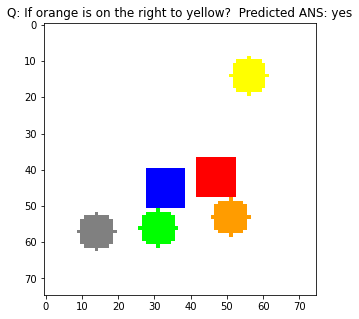

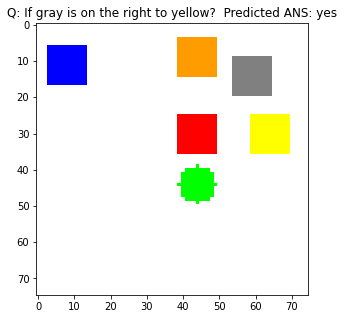

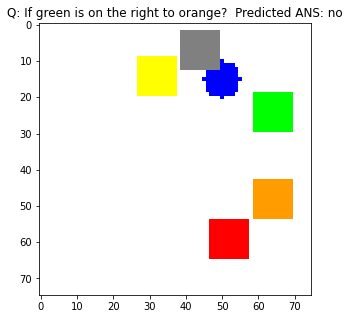

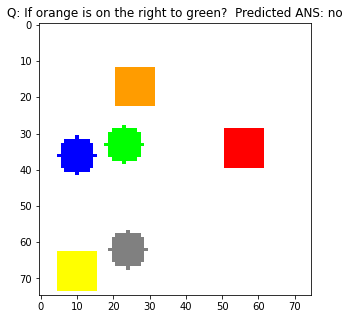

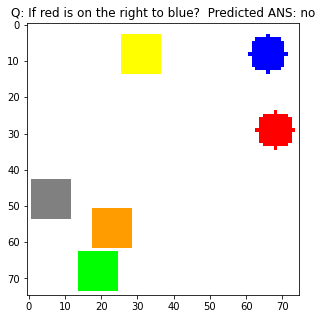

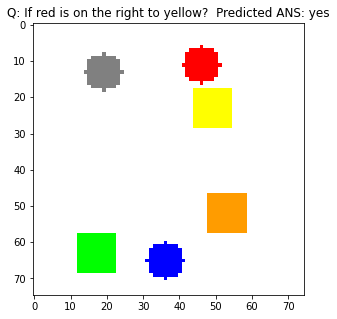

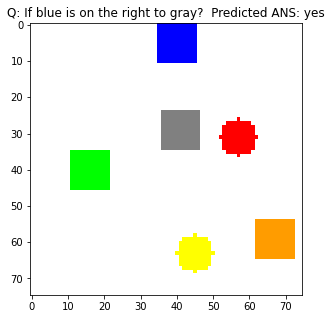

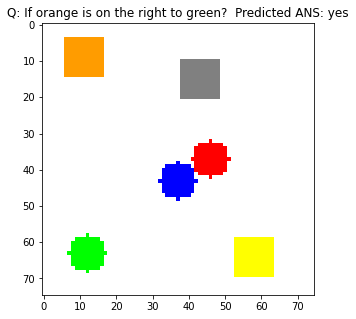

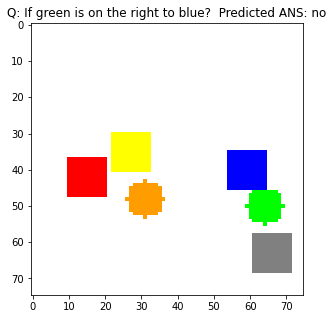

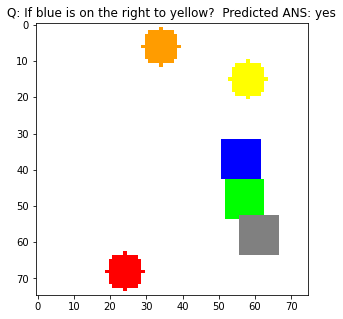

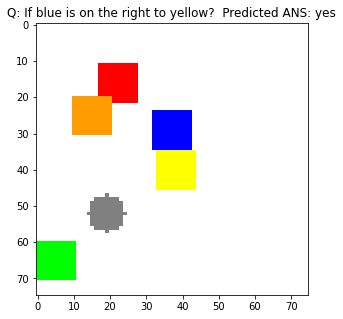

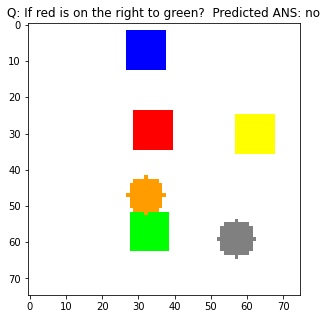

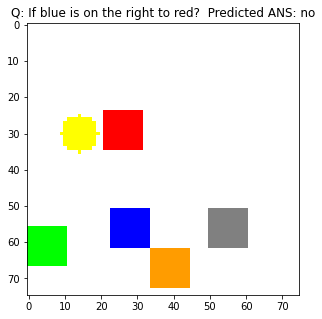

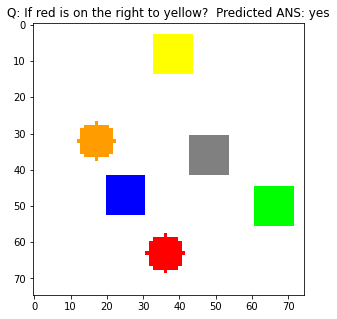

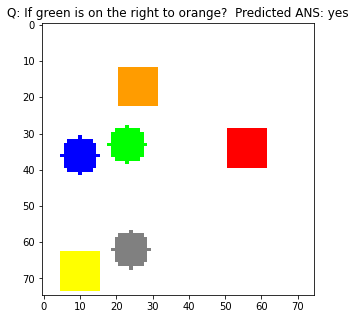

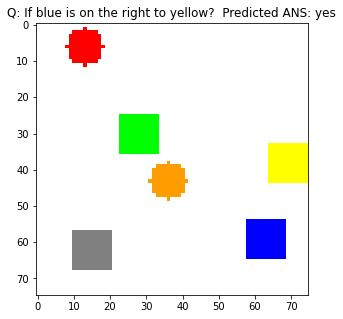

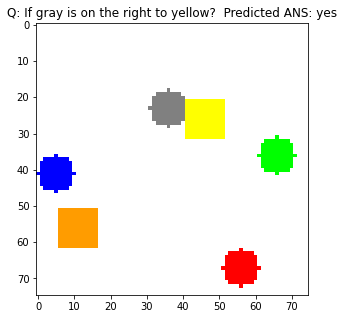

In [ ]:
plot_fig(samples_full)

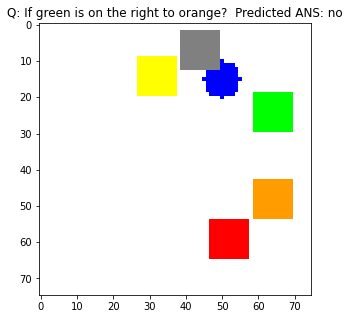

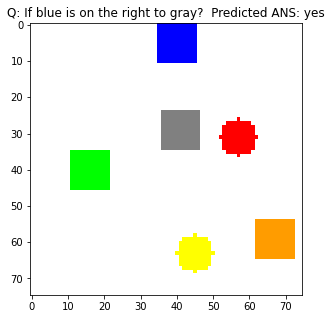

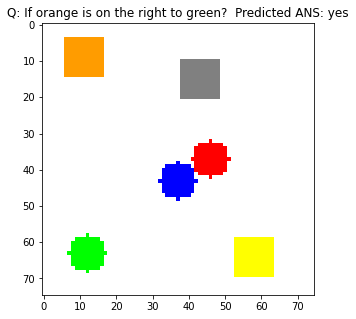

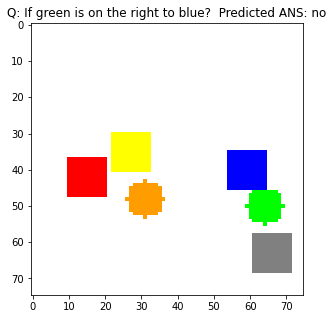

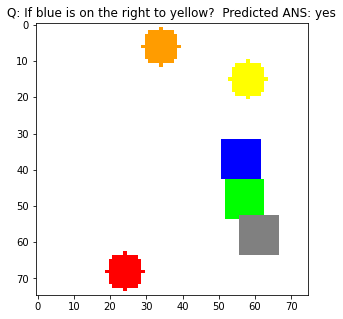

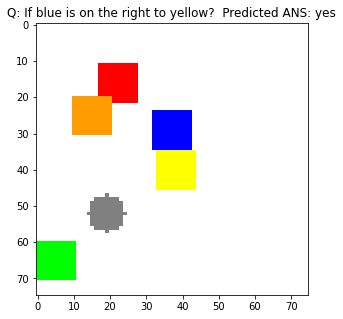

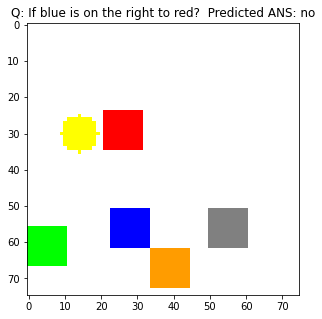

In [ ]:
plot_fig(common_error)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


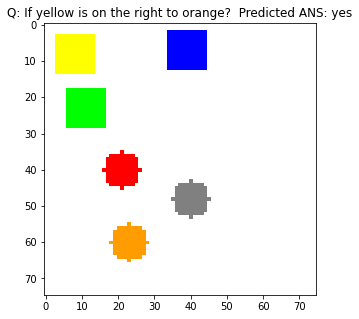

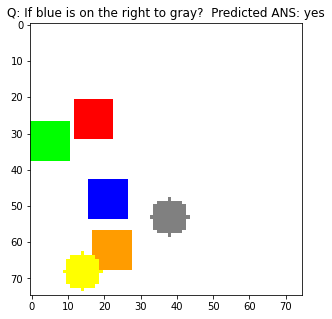

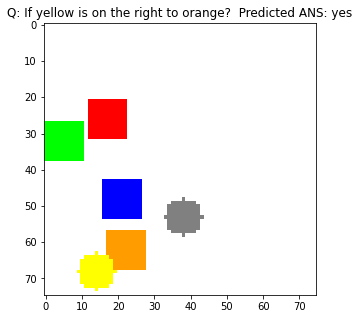

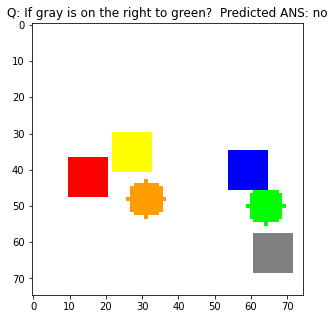

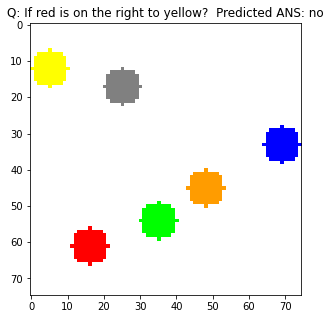

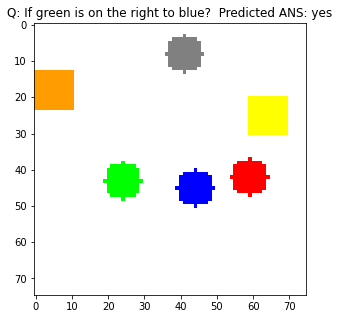

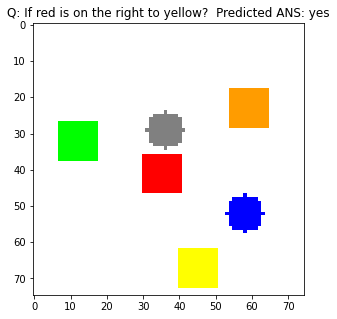

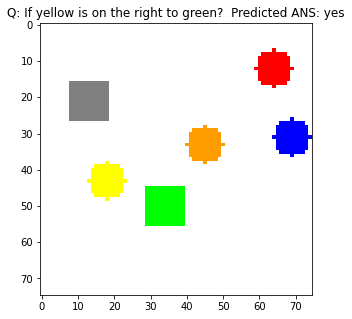

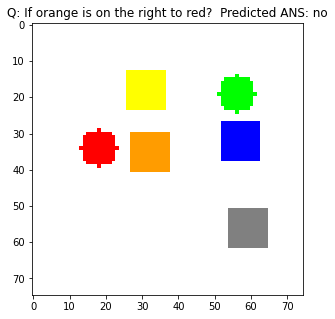

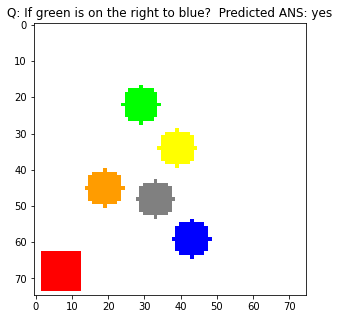

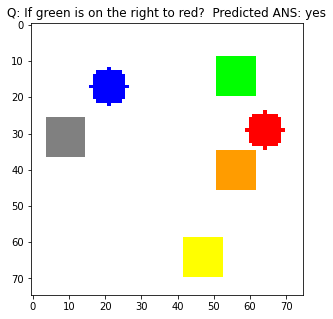

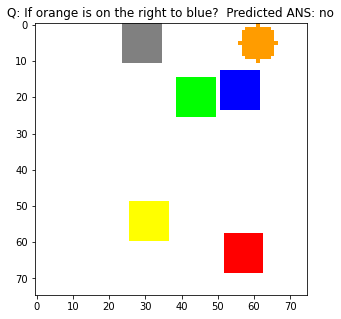

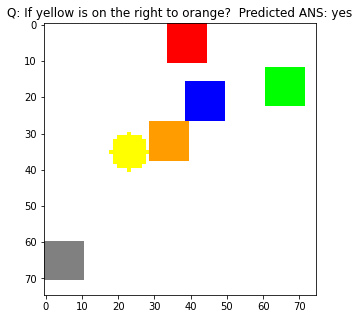

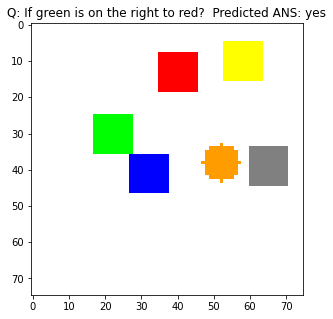

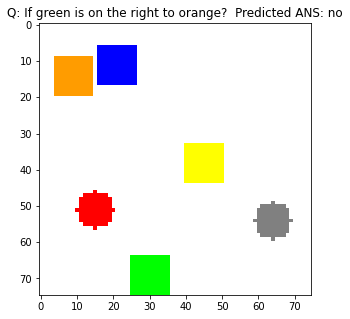

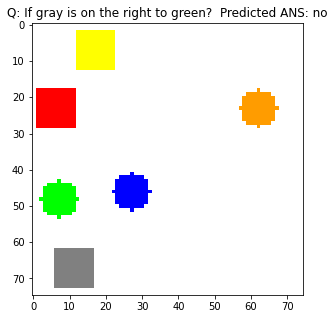

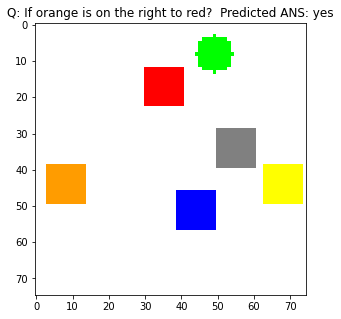

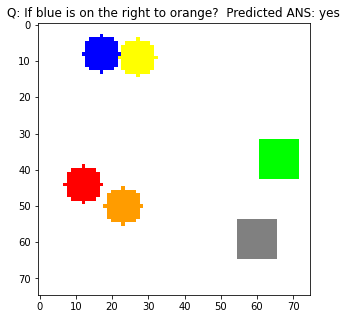

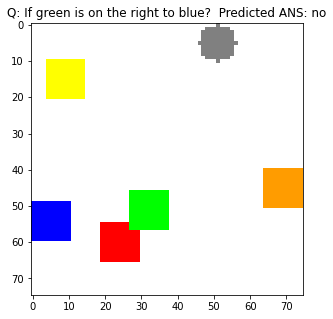

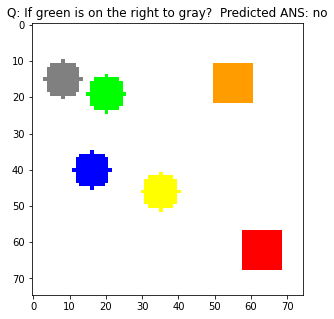

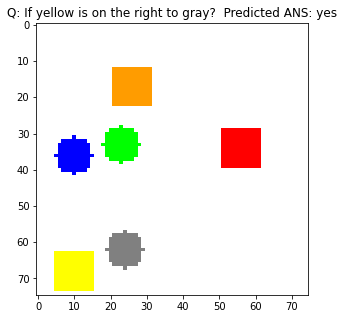

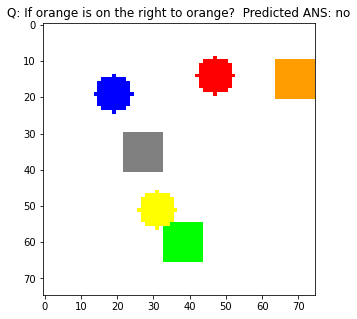

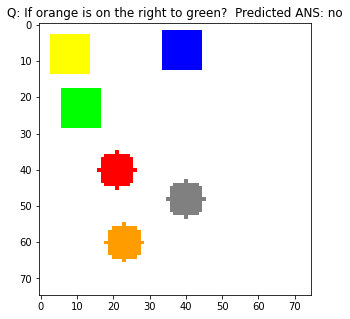

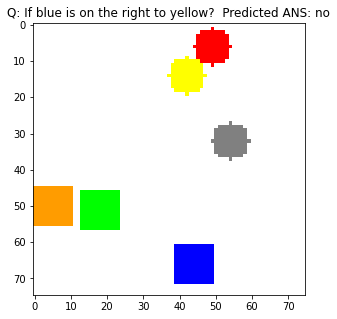

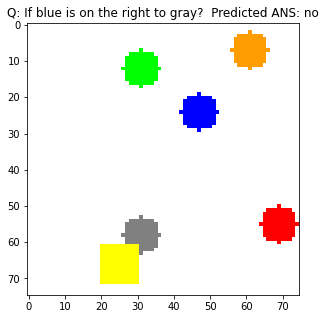

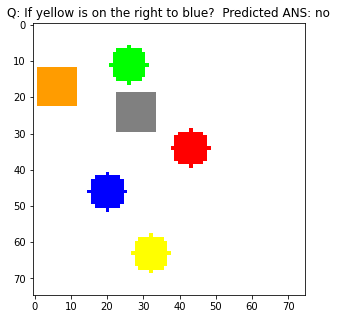

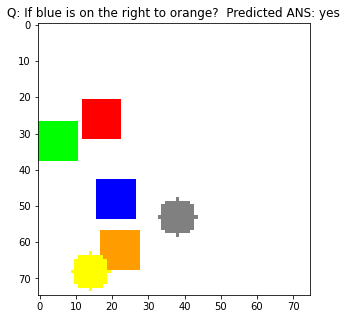

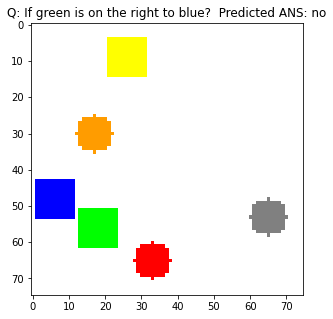

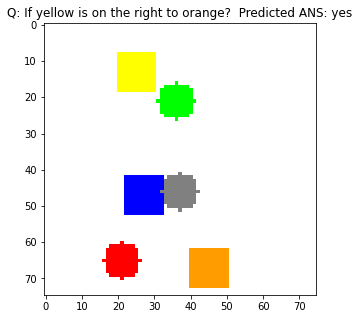

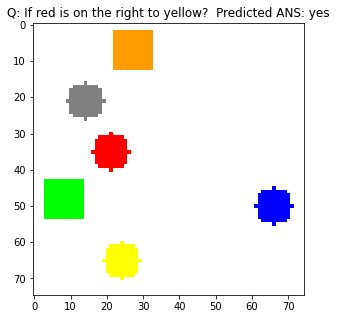

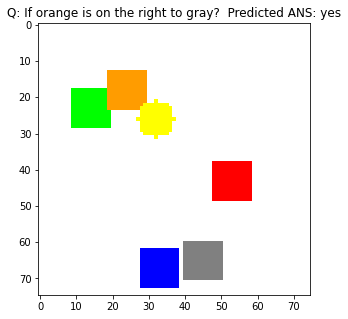

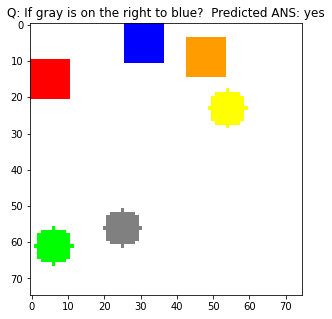

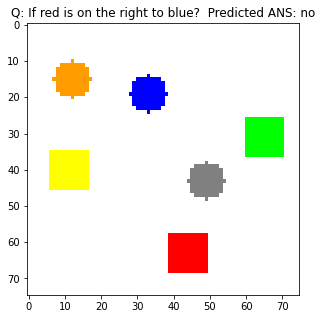

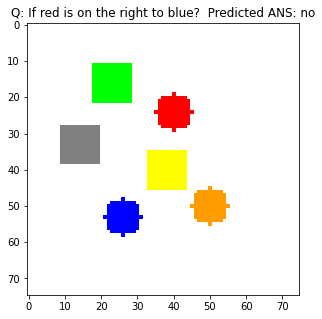

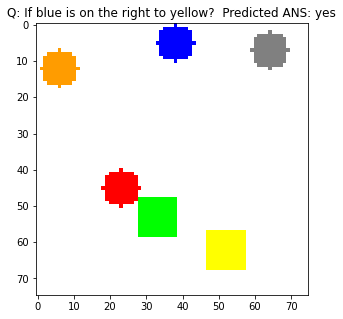

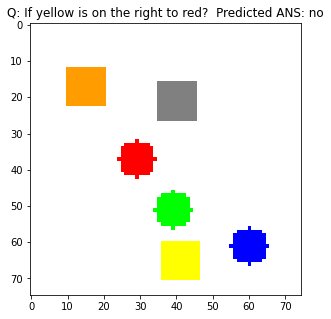

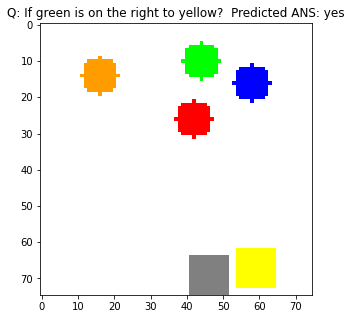

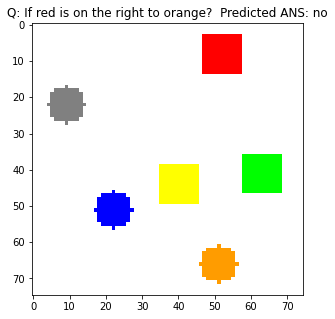

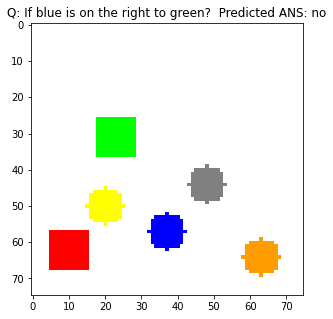

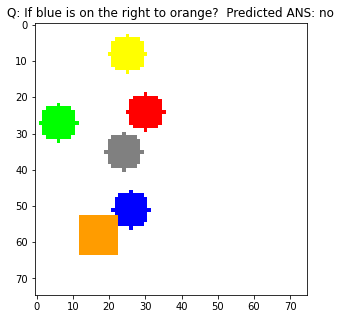

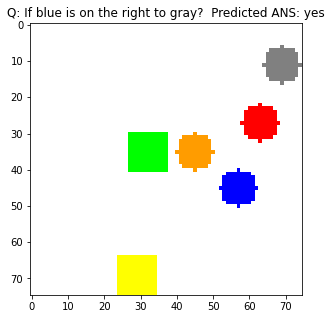

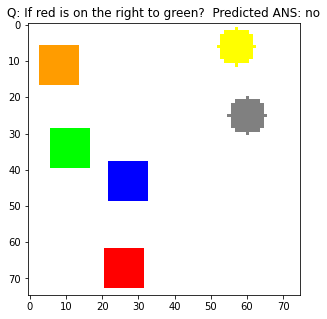

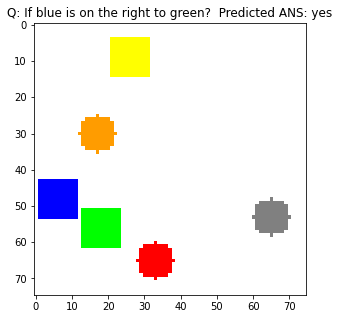

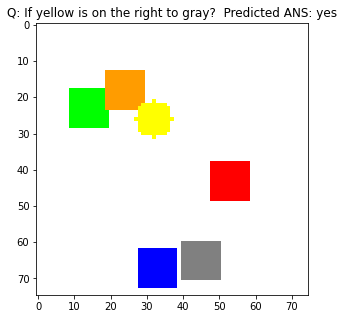

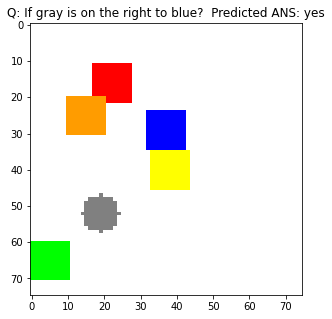

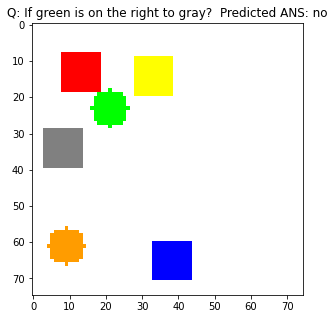

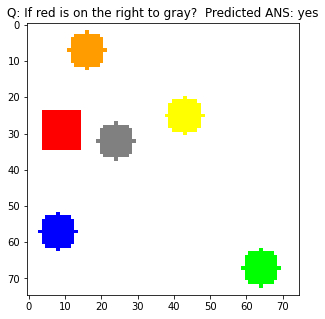

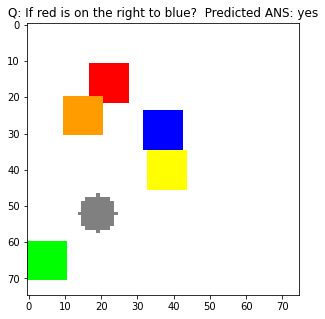

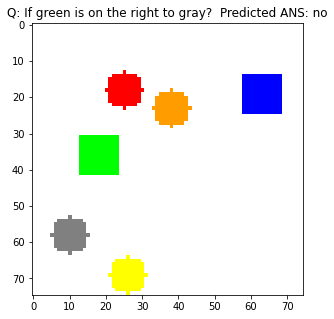

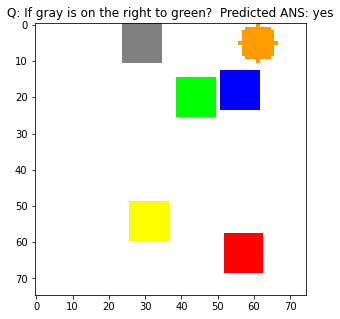

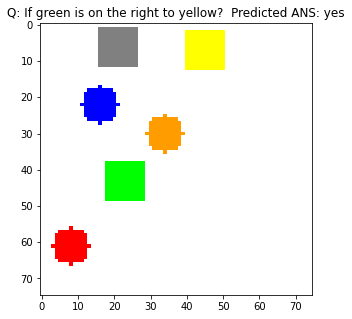

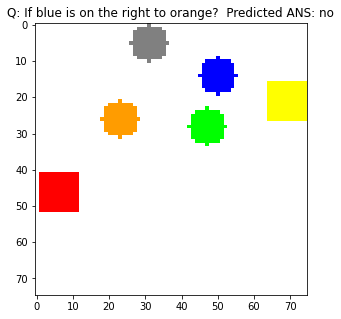

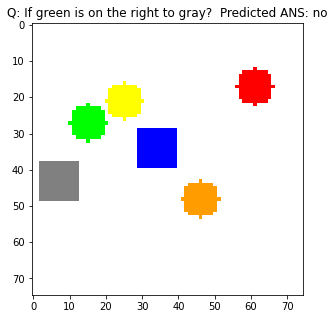

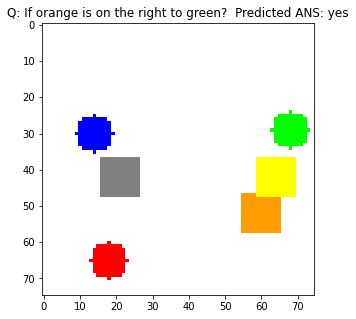

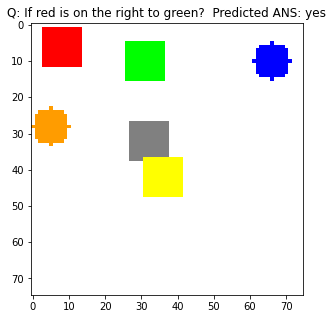

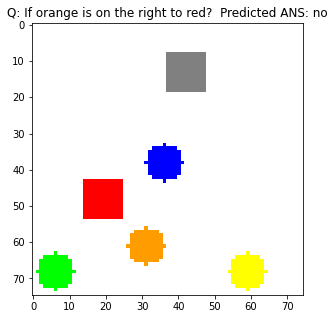

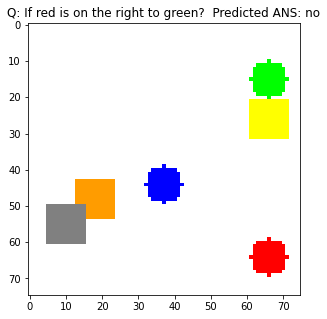

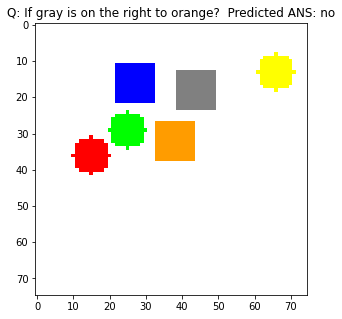

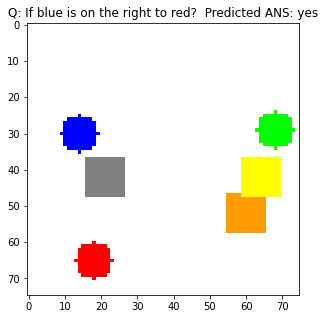

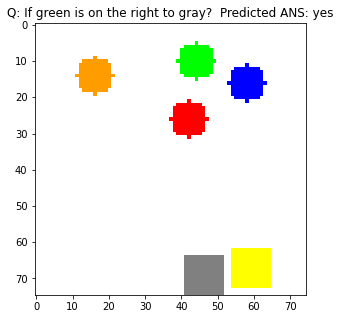

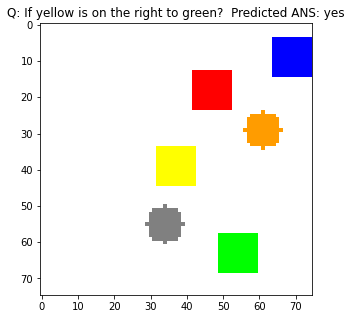

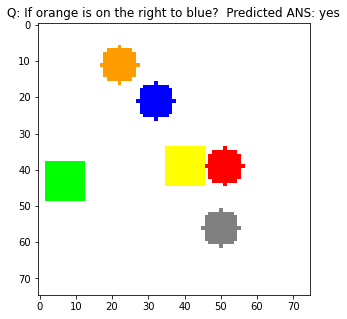

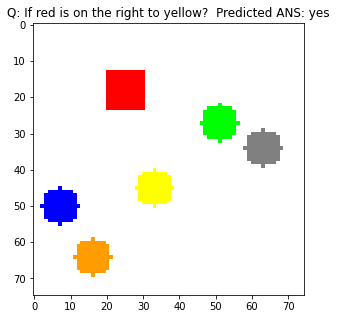

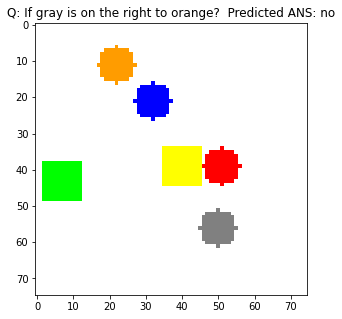

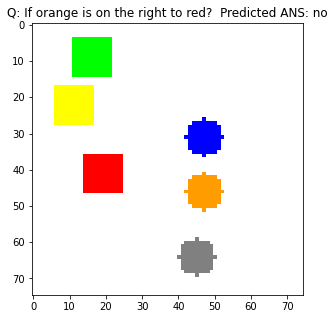

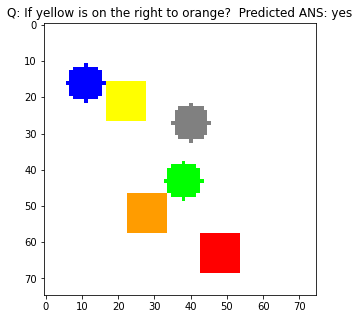

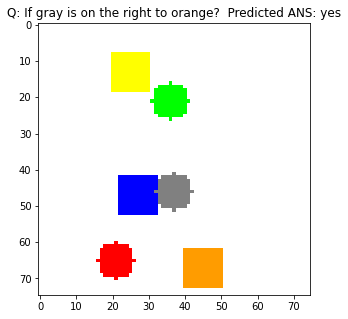

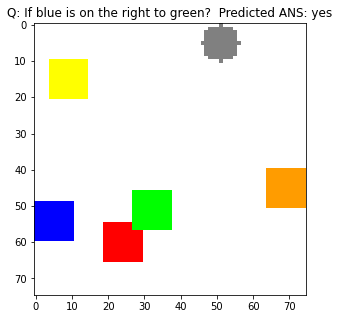

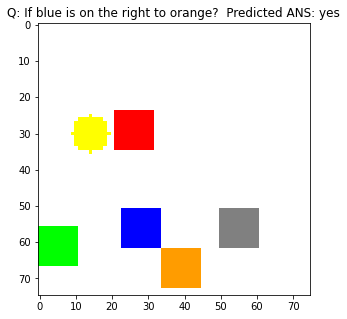

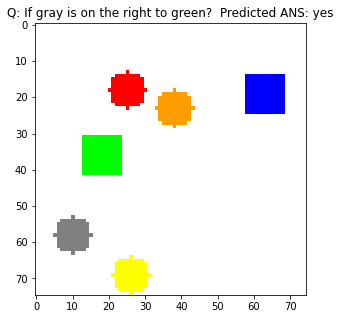

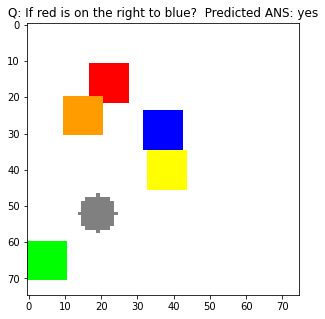

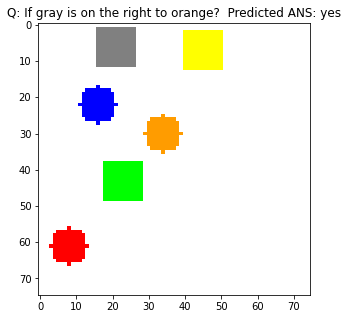

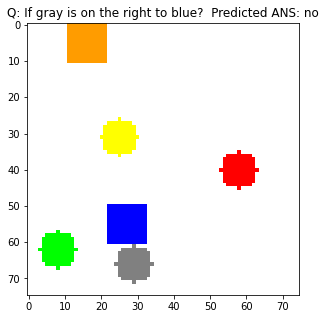

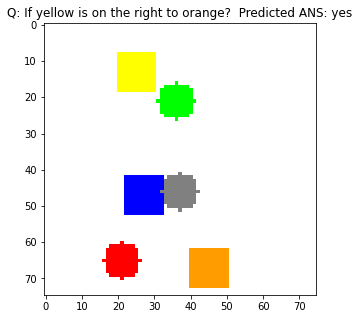

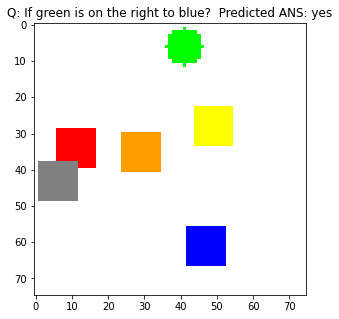

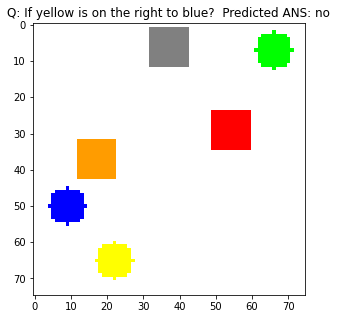

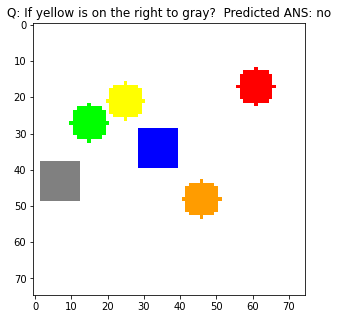

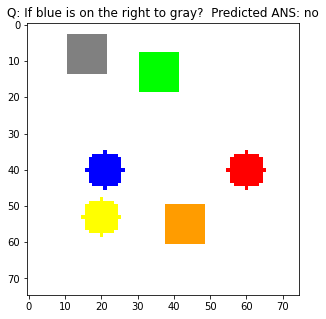

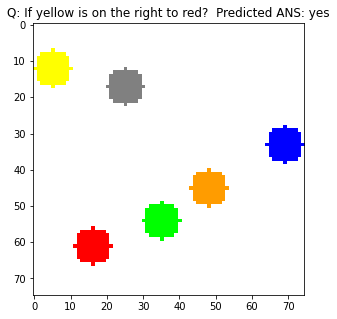

In [ ]:
plot_fig(noH_error)